### Import necessary libraries and load dataset

In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\acer\\Documents\\PythonProjects\\employee_data_rounded.csv')

### Inspect dataset

In [3]:
print(df.head())

  Employee_ID  Age      Gender         Job_Role       Industry  \
0    EMP00001   58        Male               HR      Education   
1    EMP00002   57        Male  Project Manager        Finance   
2    EMP00003   24  Non-binary         Designer      Education   
3    EMP00004   46        Male               HR         Retail   
4    EMP00005   26        Male        Marketing  Manufacturing   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                    9        Hybrid                     52   
1                   31        Remote                     54   
2                   30        Remote                     48   
3                   20        Onsite                     58   
4                   26        Remote                     59   

   Number_of_Virtual_Meetings_Per_Week  Work_Life_Balance_Rating Stress_Level  \
0                                    1                         1         High   
1                                   14                        

# Let's analyze our dataset

Let's first take a look at gender and work life balance rating.

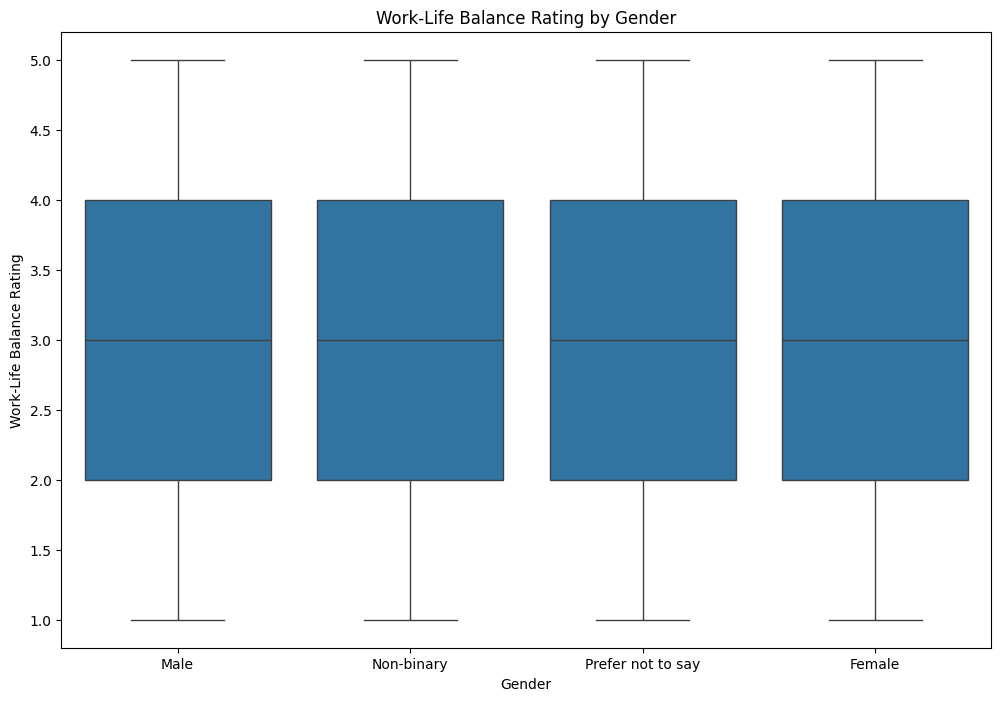

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Work_Life_Balance_Rating', data=df)
plt.title('Work-Life Balance Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Work-Life Balance Rating')
plt.show()

### There is an equal distribution in this observation so let's dive deeper.

This time, let's look at age and work life balance rating.

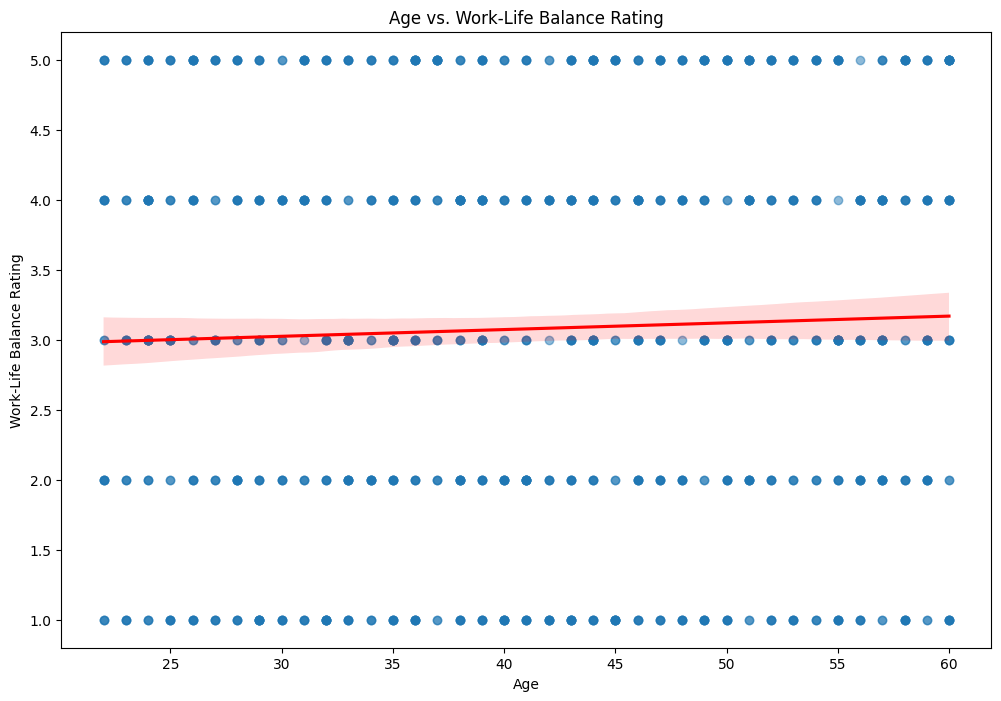

In [37]:
plt.figure(figsize=(12, 8))
sns.regplot(x='Age', y='Work_Life_Balance_Rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Age vs. Work-Life Balance Rating')
plt.xlabel('Age')
plt.ylabel('Work-Life Balance Rating')
plt.show()


### We saw that as age increases, work life balance rating increases. 

Now, let's take a look at mental health condition. We should take a deeper look on the prevalence of mental health conditions per job roles.

Mental_Health_Condition  Anxiety  Burnout  Depression  No Condition  Total  \
Job_Role                                                                     
Data Scientist                36       38          34            41    149   
Designer                      38       39          31            33    141   
HR                            29       51          40            31    151   
Marketing                     27       45          42            41    155   
Project Manager               30       36          36            32    134   
Sales                         32       37          40            36    145   
Software Engineer             28       28          31            38    125   

Mental_Health_Condition  With_Mental_Health_Conditions  \
Job_Role                                                 
Data Scientist                                     108   
Designer                                           108   
HR                                                 120   
Marketi

<Figure size 1600x1000 with 0 Axes>

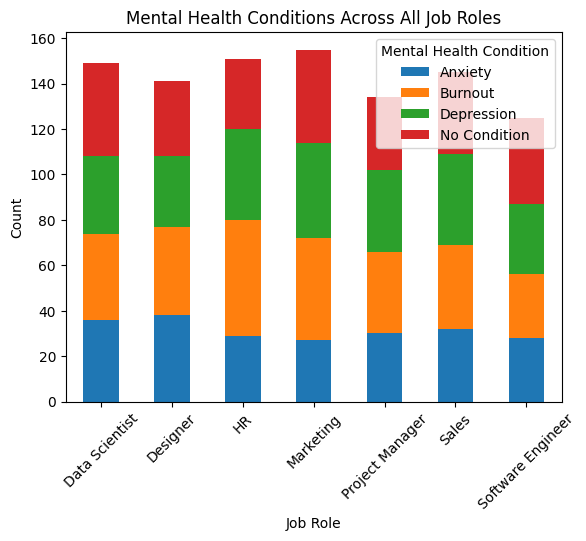

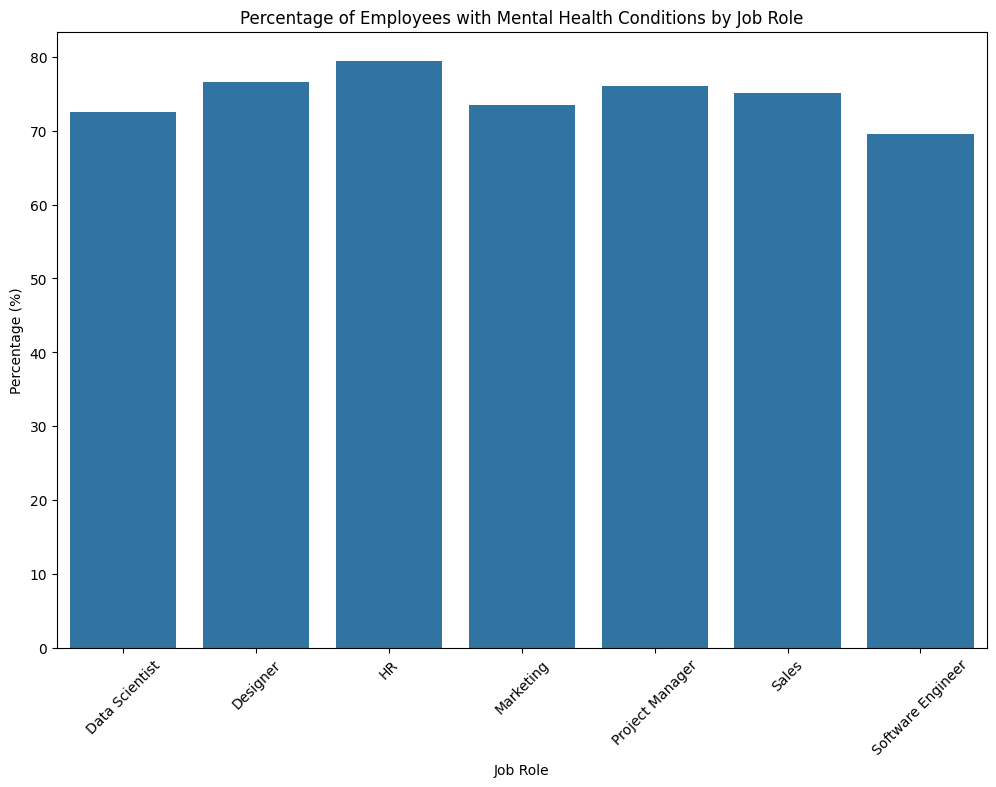

In [41]:
# Fill blanks in the Mental_Health_Condition column with 'No Condition'
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('No Condition')

# Count of mental health conditions for each job role
mental_health_count_all_roles = df.groupby(['Job_Role', 'Mental_Health_Condition']).size().unstack(fill_value=0)

# Calculate the total number of employees for each job role
mental_health_count_all_roles['Total'] = mental_health_count_all_roles.sum(axis=1)

# Calculate the number of employees with mental health conditions for each job role
mental_health_count_all_roles['With_Mental_Health_Conditions'] = mental_health_count_all_roles[['Anxiety', 'Burnout', 'Depression']].sum(axis=1)

# Calculate the percentage of employees with mental health conditions
mental_health_count_all_roles['Percentage_With_Conditions'] = (
    mental_health_count_all_roles['With_Mental_Health_Conditions'] / mental_health_count_all_roles['Total']
) * 100

# Display the DataFrame
print(mental_health_count_all_roles)

# Visualization of mental health conditions count
plt.figure(figsize=(16, 10)) 
#drop grouped tables from the previous table and used the remaining tables for the visualization
mental_health_count_all_roles.drop(columns=['Total', 'With_Mental_Health_Conditions', 'Percentage_With_Conditions']).plot(kind='bar', stacked=True)
plt.title('Mental Health Conditions Across All Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45) # rotates the labels in 45 degrees angle for readability
plt.legend(title='Mental Health Condition')
plt.show()

# Visualization of percentage of employees with mental health conditions
plt.figure(figsize=(12, 8))
sns.barplot(x=mental_health_count_all_roles.index, y='Percentage_With_Conditions', data=mental_health_count_all_roles)
plt.title('Percentage of Employees with Mental Health Conditions by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45) #rotates labels in 45 degrees angle for better readability
plt.show()


### Observations:

HR, Project Manager and Designer roles have higher percentage of mental health conditions. Now, let's take a look if mental health condition has any effect on work-life balance rating.

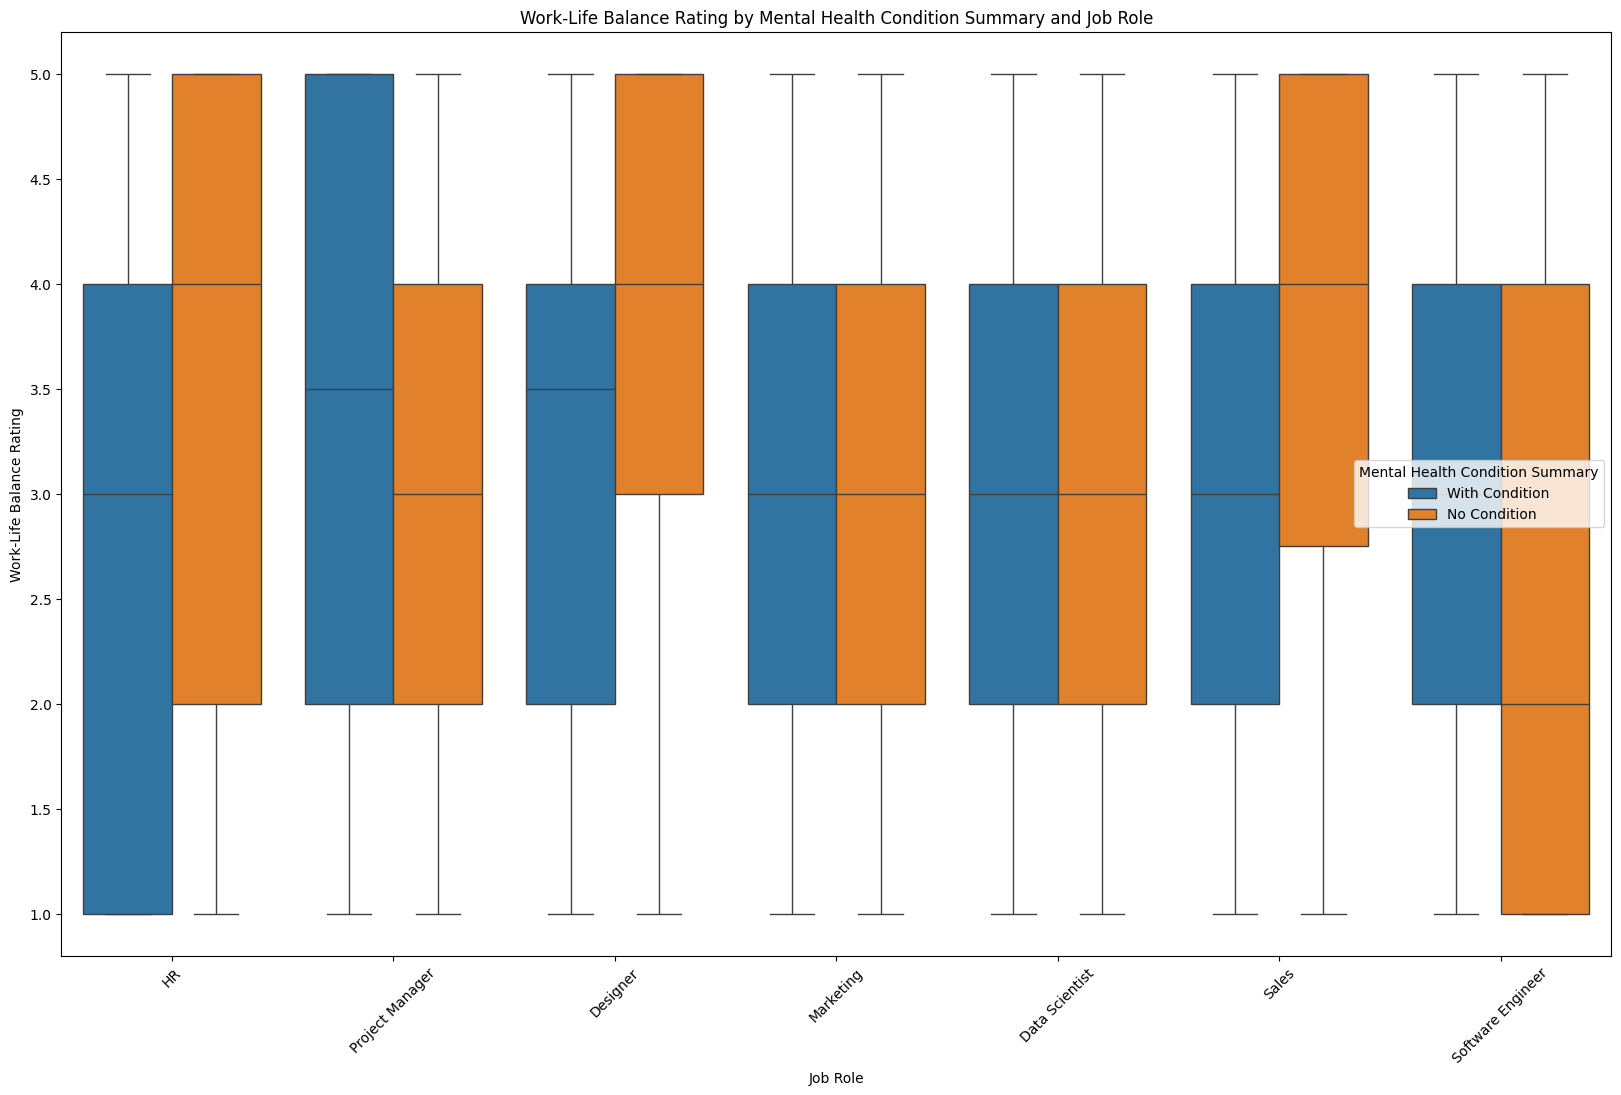

In [44]:
# Summarize work-life balance ratings
rating_summary = df.copy()
rating_summary['Condition'] = rating_summary['Mental_Health_Condition'].apply(lambda x: 'With Condition' if x != 'No Condition' else 'No Condition')

# Calculate mean work-life balance rating per job role with or without condition
mean_rating = rating_summary.groupby(['Job_Role', 'Condition'])['Work_Life_Balance_Rating'].mean().reset_index()

# Boxplot 
plt.figure(figsize=(20, 12))
sns.boxplot(x='Job_Role', y='Work_Life_Balance_Rating', hue='Condition', data=rating_summary)
plt.title('Work-Life Balance Rating by Mental Health Condition Summary and Job Role')
plt.xlabel('Job Role')
plt.ylabel('Work-Life Balance Rating')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Condition Summary')
plt.show()


### Insights:

HR, Designers without mental health problems show higher work-life balance ratings. But, surprisingly, Project Managers with mental condition reveal higher work-life balance ratings compared to those without any mental health problems.

Project Managers, Data Scientists, and Marketing roles demonstrate high resilience, maintaining stable work-life balance ratings despite the presence of mental health conditions.

Let's inspect other factors which may be the reason for Project Managers, Data Scientists and Marketers having high work-life balance ratings despite mental health problems.

Let's take a look at work location. 

   Work_Location           Job_Role  Count  Total_Count  Percentage
0         Hybrid     Data Scientist     55          321   17.133956
1         Hybrid           Designer     48          321   14.953271
2         Hybrid                 HR     39          321   12.149533
3         Hybrid          Marketing     45          321   14.018692
4         Hybrid    Project Manager     45          321   14.018692
5         Hybrid              Sales     50          321   15.576324
6         Hybrid  Software Engineer     39          321   12.149533
7         Onsite     Data Scientist     49          364   13.461538
8         Onsite           Designer     44          364   12.087912
9         Onsite                 HR     67          364   18.406593
10        Onsite          Marketing     60          364   16.483516
11        Onsite    Project Manager     42          364   11.538462
12        Onsite              Sales     56          364   15.384615
13        Onsite  Software Engineer     46      

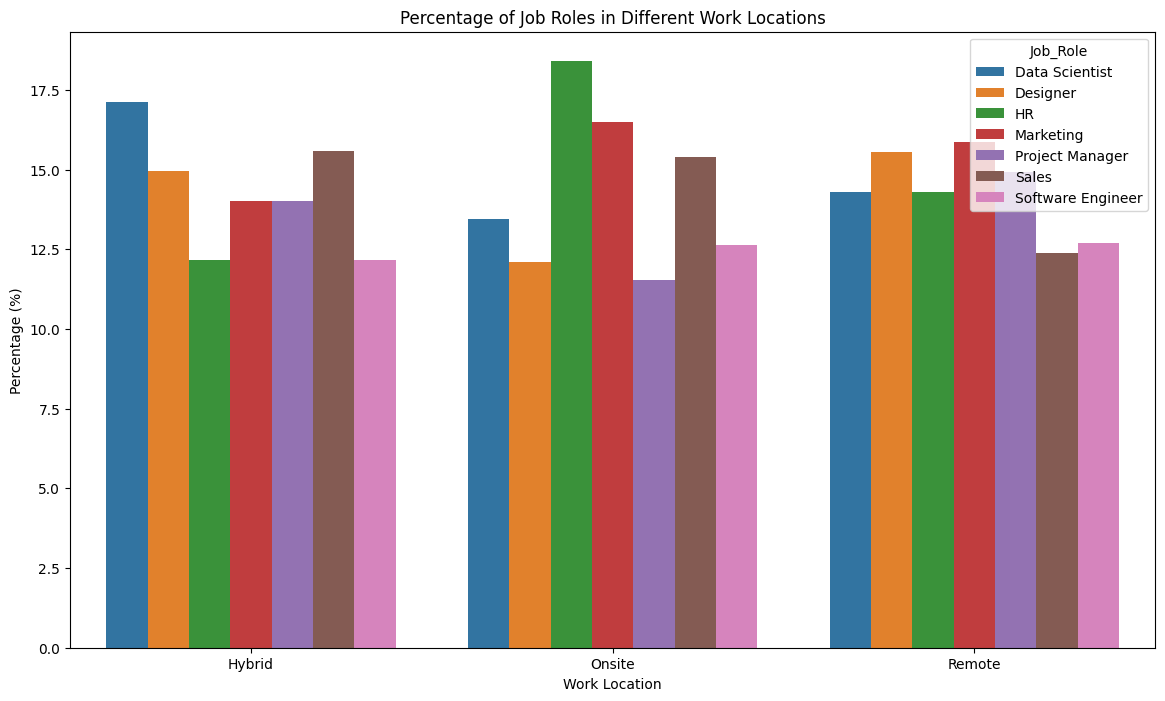

In [46]:
# Group data by Work_Location and Job_Role to get the counts
work_location_summary = df.groupby(['Work_Location', 'Job_Role']).size().reset_index(name='Count')

# Calculate the total count for each work location
total_counts = work_location_summary.groupby('Work_Location')['Count'].sum().reset_index(name='Total_Count')

# Merge the total counts back with the work location summary
work_location_summary = work_location_summary.merge(total_counts, on='Work_Location')

# Calculate the percentage for each job role in each work location
work_location_summary['Percentage'] = (work_location_summary['Count'] / work_location_summary['Total_Count']) * 100

# Display the summary
print(work_location_summary)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='Work_Location', y='Percentage', hue='Job_Role', data=work_location_summary)
plt.title('Percentage of Job Roles in Different Work Locations')
plt.xlabel('Work Location')
plt.ylabel('Percentage (%)')
plt.show()


### Results:

Hybrid Work Location:
Data Scientist, Designer, Sales, Marketing and Project Manager roles have high percentage with Data Scientist with the highest percentage.

Onsite Work Location:
HR dominates the onsite work locations with the highest percentage. Sales and Marketing also have high percentage. 

Remote Work Location:
Marketing, Project Manager and Designer roles have highest percentage. 

In the bar graph on Work Life balance Ratings by mental health condition Summary and Job Role, we saw that Project Managers, Data Scientists, and Marketing roles have high work-life balance ratings despite their mental health conditions. In fact, Project Managers with mental condition reveal higher work-life balance ratings compared with Project Managers without mental health condition. 

Now, let's look closer how work life balance ratings are affected by mental health condition along with work location for various job roles. 

<Figure size 2000x1200 with 0 Axes>

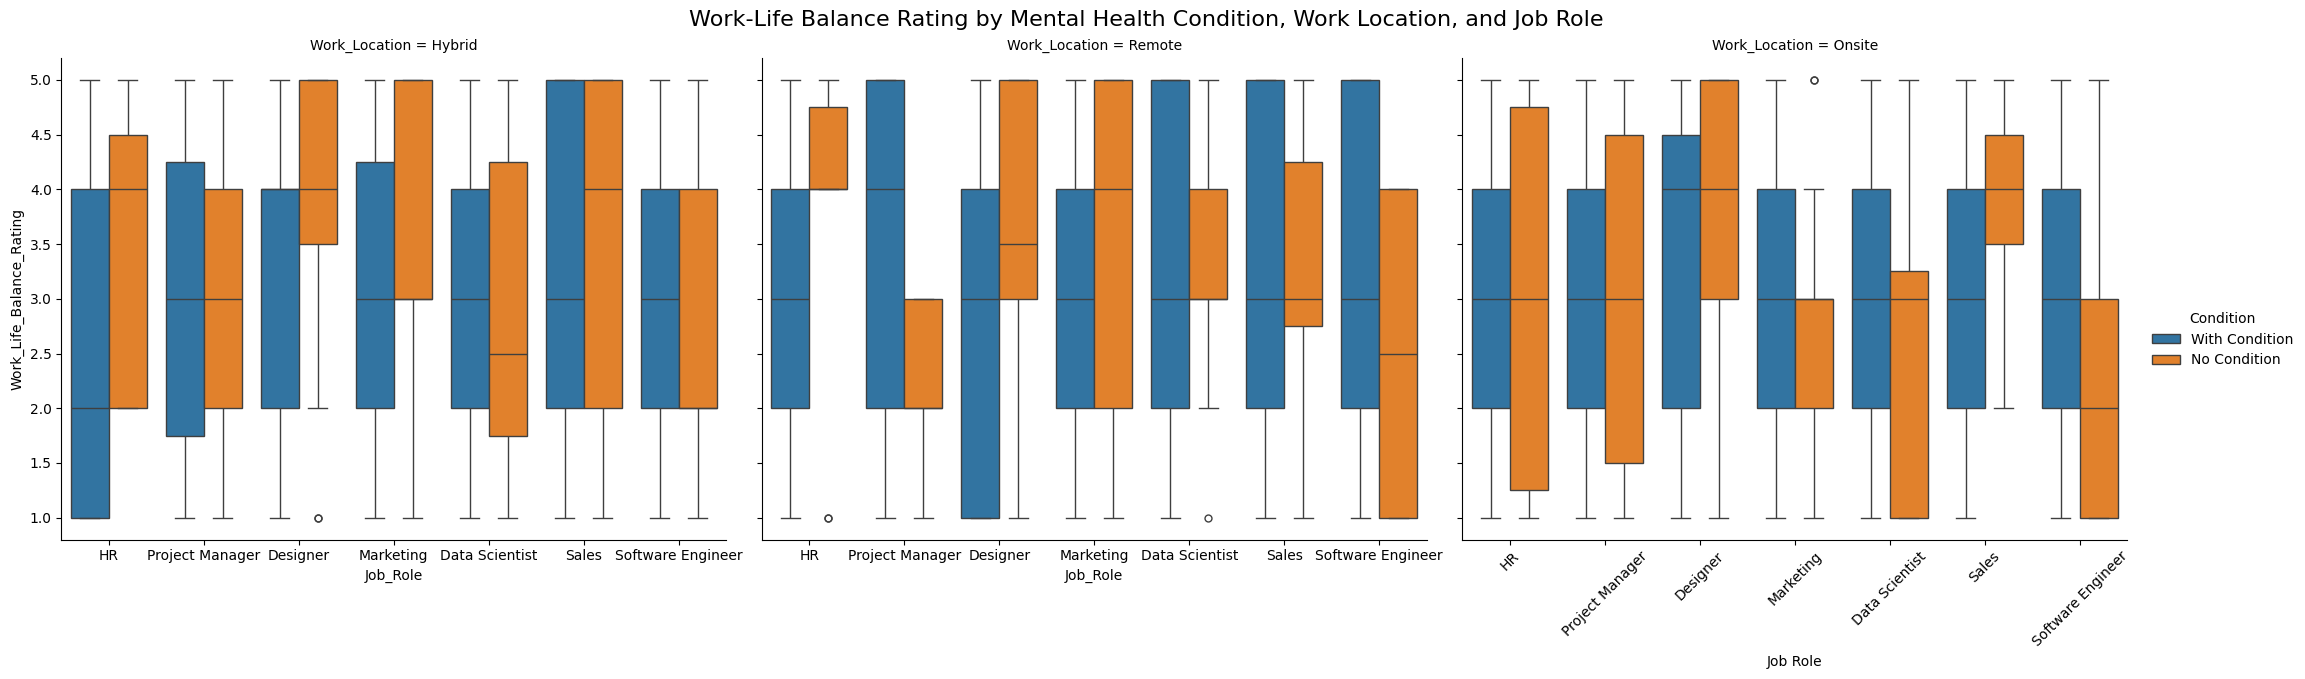

In [ ]:
# Summarize work-life balance ratings
rating_summary = df.copy()
rating_summary['Condition'] = rating_summary['Mental_Health_Condition'].apply(lambda x: 'With Condition' if x != 'No Condition' else 'No Condition')

# Calculate mean work-life balance rating
mean_rating = rating_summary.groupby(['Job_Role', 'Condition', 'Work_Location'])['Work_Life_Balance_Rating'].mean().reset_index()

# Combined plot
plt.figure(figsize=(20, 12))
sns.catplot(x='Job_Role', y='Work_Life_Balance_Rating', hue='Condition', col='Work_Location', data=rating_summary, kind='box', height=6, aspect=1.2)
plt.subplots_adjust(top=0.9)
plt.suptitle('Work-Life Balance Rating by Mental Health Condition, Work Location, and Job Role', size=16)
plt.xlabel('Job Role')
plt.ylabel('Work-Life Balance Rating')
plt.xticks(rotation=45)
plt.show()


## Key Findings: 

Project Managers, Data Scientists, and Marketing roles consistently show high resilience, maintaining stable work-life balance ratings despite mental health conditions. Most of them work in Hybrid setup. 

But, Designers consistently show a noticeable drop in work-life balance ratings for employees with mental health conditions across all work locations. 

Data suggests that for certain roles like Project Managers, Data Scientists, and Marketing, mental health conditions seem to have a minimal impact on their work-life balance ratings. Work location might play a more significant role. Here's a deeper dive into these findings:

## Recommendations:
Support Systems: Enhance support systems for roles like Designers, who show a noticeable impact on work-life balance due to mental health conditions. Provide access to mental health resources, counseling services, and stress management programs.

Promote Flexible Work Arrangements: Encourage hybrid and remote work options, which show minimal differences in work-life balance ratings between employees with and without mental health conditions. Tailoring work setups to individual preferences can enhance overall well-being and productivity.

Regular Monitoring and Surveys: Conduct regular check-ins and surveys to assess employee mental health and work-life balance. Proactively address issues to prevent the escalation of mental health problems and maintain a healthy work environment.